## Sentiment Analysis of reviews from Healthcare Industry

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
# import dataset
dataset = pd.read_csv('mydatasetforcapstone.csv')

In [ ]:
# Lets see how our dataset looks
# Dimensionality of the DataFrame-shape
print(dataset.shape)
# First few rows of our dataset
print(dataset.head())
# Full summary of the dataframe
print(dataset.info())
# Descriptive statistics of the dataframe
print(dataset.describe(include="all"))
# Rating counts
print(dataset['Rating'].value_counts())
print(dataset['Company'].value_counts())

(300, 4)
   Unnamed: 0                                           Reviews  Rating  \
0           0  Felt that Dr Harsh dua is devdoot to his patient       5   
1           1                Arrogant doctors in dental section       4   
2           2                    My next door friendly hospital       4   
3           3                         Review about the hospital       5   
4           4                            Review of the hospital       5   

  Company  
0  Apollo  
1  Apollo  
2  Apollo  
3  Apollo  
4  Apollo  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  300 non-null    int64 
 1   Reviews     300 non-null    object
 2   Rating      300 non-null    int64 
 3   Company     300 non-null    object
dtypes: int64(2), object(2)
memory usage: 9.5+ KB
None
        Unnamed: 0                        Reviews      Rating Company

In [ ]:
# Adding text-length as a field in the dataset
dataset['text length'] = dataset['Reviews'].apply(len)
print(dataset.head())

   Unnamed: 0                                           Reviews  Rating  \
0           0  Felt that Dr Harsh dua is devdoot to his patient       5   
1           1                Arrogant doctors in dental section       4   
2           2                    My next door friendly hospital       4   
3           3                         Review about the hospital       5   
4           4                            Review of the hospital       5   

  Company  text length  
0  Apollo           48  
1  Apollo           34  
2  Apollo           30  
3  Apollo           25  
4  Apollo           22  


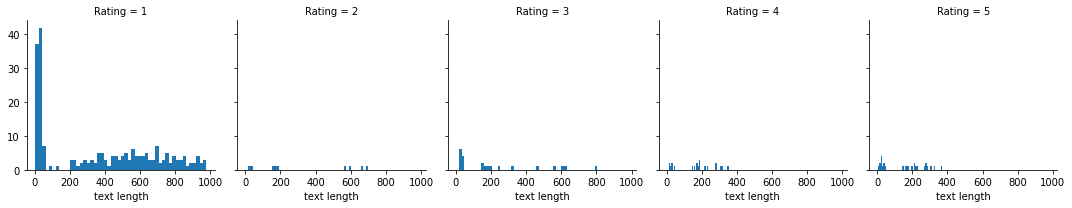

In [ ]:
#Basic visualization of data using histograms
graph = sns.FacetGrid(data=dataset, col='Rating')
graph.map(plt.hist, 'text length', bins=50)

<AxesSubplot:xlabel='Rating', ylabel='text length'>

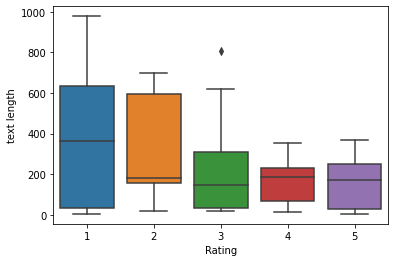

In [ ]:
# Box-plot visvualization
sns.boxplot(x='Rating', y='text length', data=dataset)

In [ ]:
# Let us only grab the reviews with 1 star or 5 star
dataset_class = dataset[(dataset['Rating'] == 1) | (dataset['Rating'] == 5)]
print(dataset_class.shape)
print(dataset_class.head())

(247, 5)
   Unnamed: 0                                           Reviews  Rating  \
0           0  Felt that Dr Harsh dua is devdoot to his patient       5   
3           3                         Review about the hospital       5   
4           4                            Review of the hospital       5   
5           5                               Delhi best hospital       1   
6           6                         Dr. Sujit kumar chowdhary       1   

  Company  text length  
0  Apollo           48  
3  Apollo           25  
4  Apollo           22  
5  Apollo           19  
6  Apollo           25  


## Text Pre-Processing

In [ ]:
# store the reviews & ratings in two separate lists
classes=dataset_class['Rating']
text_messages=dataset_class['Reviews']
print(text_messages[0:6],"\n",classes[0:6])

0    Felt that Dr Harsh dua is devdoot to his patient
3                           Review about the hospital
4                              Review of the hospital
5                                 Delhi best hospital
6                           Dr. Sujit kumar chowdhary
7                                    Worst experience
Name: Reviews, dtype: object 
 0    5
3    5
4    5
5    1
6    1
7    1
Name: Rating, dtype: int64


In [ ]:
# Convert the classes into binary format : Rating 5="1"  ,  Rating 1="0"
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(classes)  #new class variable
company_name=list(dataset_class['Company'])
print(Y[0:6])
print(type(company_name))

[1 1 1 0 0 0]
<class 'list'>


In [ ]:
# Use Regular Expressions to replace email addresses,symbols,phone nos,urls etc

# replacing email addresses with emailaddr
processed=text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddr')
# replacing urls with webaddress
processed=processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
# replace money symbols with moneysymb
processed=processed.str.replace(r'£|\$','moneysymb')
# replace phone numbers with phonenumb
processed=processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumbr')
# replace normal numbers with numbr
processed=processed.str.replace(r'\d+(\.\d+)?','numbr')
# remove punctuation
processed=processed.str.replace(r'[^\w\d\s]', ' ')
# remove whitespace with a single space
processed=processed.str.replace(r'\s+', ' ')
# remove leading and trailing whitespace
processed=processed.str.replace(r'^\s+|\s+?$','')
#convert text to lowercase
processed=processed.str.lower()

print(processed[0:6])

<ipython-input-9-7442b6e8cbf7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  processed=text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddr')
<ipython-input-9-7442b6e8cbf7>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  processed=processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
<ipython-input-9-7442b6e8cbf7>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  processed=processed.str.replace(r'£|\$','moneysymb')
<ipython-input-9-7442b6e8cbf7>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  processed=processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumbr')
<ipython-input-9-7442b6e8cbf7>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  processed=processed.str.replac

0    felt that dr harsh dua is devdoot to his patient
3                           review about the hospital
4                              review of the hospital
5                                 delhi best hospital
6                            dr sujit kumar chowdhary
7                                    worst experience
Name: Reviews, dtype: object


In [ ]:
# Remove Stopwords, Lemmatization
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
processed=processed.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove word stems-Lemmatizing procedure using WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
ls = WordNetLemmatizer()
processed=processed.apply(lambda x: ' '.join(ls.lemmatize(term) for term in x.split()))

print(processed[0:6])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    felt dr harsh dua devdoot patient
3                      review hospital
4                      review hospital
5                  delhi best hospital
6             dr sujit kumar chowdhary
7                     worst experience
Name: Reviews, dtype: object


In [ ]:
# Finding the most common and rare words
common= pd.Series(' '.join(processed).split()).value_counts()[0:15]
print(common)
rare= pd.Series(' '.join(processed).split()).value_counts()[-10:]
print(rare)

numbr        233
humana       232
get           76
year          71
insurance     65
doctor        61
time          60
hospital      57
call          55
pay           55
plan          53
company       53
service       51
one           51
medicare      46
dtype: int64
original        1
overwhelming    1
confirms        1
unbearable      1
haste           1
conscience      1
amended         1
rx              1
cheat           1
paper           1
dtype: int64


In [ ]:
# Representation of bag-of-words model
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
all_words=[]
for message in processed:
    words=word_tokenize(message)
    for w in words:
        all_words.append(w)
all_words=nltk.FreqDist(all_words)
#for key,val in all_words.items():
    #print (str(key) + ':' + str(val))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# create a new dataset with the processed reviews and corresponding encoded rating for feature extraction
new_data={'Reviews':processed,
             'Rating':Y,
          'Company':company_name
         }
final=pd.DataFrame(new_data)
print(final.head())

                             Reviews  Rating Company
0  felt dr harsh dua devdoot patient       1  Apollo
3                    review hospital       1  Apollo
4                    review hospital       1  Apollo
5                delhi best hospital       0  Apollo
6           dr sujit kumar chowdhary       0  Apollo


In [ ]:
import nltk

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Feature Engineering

In [ ]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
final["sentiments"] = final["Reviews"].apply(lambda x: sid.polarity_scores(x))
final = pd.concat([final.drop(['sentiments'], axis=1), final['sentiments'].apply(pd.Series)], axis=1)
print(final.head())
print(final.shape)

                             Reviews  Rating Company    neg    neu    pos  \
0  felt dr harsh dua devdoot patient       1  Apollo  0.367  0.633  0.000   
3                    review hospital       1  Apollo  0.000  1.000  0.000   
4                    review hospital       1  Apollo  0.000  1.000  0.000   
5                delhi best hospital       0  Apollo  0.000  0.323  0.677   
6           dr sujit kumar chowdhary       0  Apollo  0.000  1.000  0.000   

   compound  word_count  char_count  doc2vec_vector_0  ...  word_went  \
0   -0.4404           6          33          0.053097  ...        0.0   
3    0.0000           2          15         -0.097994  ...        0.0   
4    0.0000           2          15         -0.095917  ...        0.0   
5    0.6369           3          19          0.081120  ...        0.0   
6    0.0000           4          24         -0.098789  ...        0.0   

   word_without  word_work  word_worst  word_would  word_year    neg    neu  \
0           0.0    

In [ ]:
# including metrics like word count and character count
final['word_count'] = final['Reviews'].apply(lambda x: len(str(x).split(" ")))
final['char_count'] = final['Reviews'].apply(lambda x:len(str(x))) ## this also includes spaces
print(final.head())

                             Reviews  Rating Company    neg    neu    pos  \
0  felt dr harsh dua devdoot patient       1  Apollo  0.367  0.633  0.000   
3                    review hospital       1  Apollo  0.000  1.000  0.000   
4                    review hospital       1  Apollo  0.000  1.000  0.000   
5                delhi best hospital       0  Apollo  0.000  0.323  0.677   
6           dr sujit kumar chowdhary       0  Apollo  0.000  1.000  0.000   

   compound  word_count  char_count  doc2vec_vector_0  ...  word_went  \
0   -0.4404           6          33          0.053097  ...        0.0   
3    0.0000           2          15         -0.097994  ...        0.0   
4    0.0000           2          15         -0.095917  ...        0.0   
5    0.6369           3          19          0.081120  ...        0.0   
6    0.0000           4          24         -0.098789  ...        0.0   

   word_without  word_work  word_worst  word_would  word_year    neg    neu  \
0           0.0    

In [ ]:
import gensim

In [ ]:
# create doc2vec vector columns
# Initialize and train the model
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final["Reviews"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = final["Reviews"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
final = pd.concat([final, doc2vec_df], axis=1)
print(type(final))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(len(documents))

247


In [ ]:
print(model)

Doc2Vec(dm/m,d5,n5,w2,s0.001,t4)


In [ ]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
# min_df = minimum document frequency
tfidf_result = tfidf.fit_transform(final["Reviews"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = final.index
final = pd.concat([final, tfidf_df], axis=1)
print(final.head())

                             Reviews  Rating Company    neg    neu    pos  \
0  felt dr harsh dua devdoot patient       1  Apollo  0.367  0.633  0.000   
3                    review hospital       1  Apollo  0.000  1.000  0.000   
4                    review hospital       1  Apollo  0.000  1.000  0.000   
5                delhi best hospital       0  Apollo  0.000  0.323  0.677   
6           dr sujit kumar chowdhary       0  Apollo  0.000  1.000  0.000   

   compound  word_count  char_count  doc2vec_vector_0  ...  word_wait  \
0   -0.4404           6          33          0.053097  ...        0.0   
3    0.0000           2          15         -0.097994  ...        0.0   
4    0.0000           2          15         -0.095917  ...        0.0   
5    0.6369           3          19          0.081120  ...        0.0   
6    0.0000           4          24         -0.098789  ...        0.0   

   word_want  word_website  word_week  word_went  word_without  word_work  \
0        0.0         

In [ ]:
print(tfidf_result[0:20])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Distribution of the ratings
print(final["Rating"].value_counts(normalize = True))

0    0.890688
1    0.109312
Name: Rating, dtype: float64


### WordCloud

In [ ]:
import wordcloud

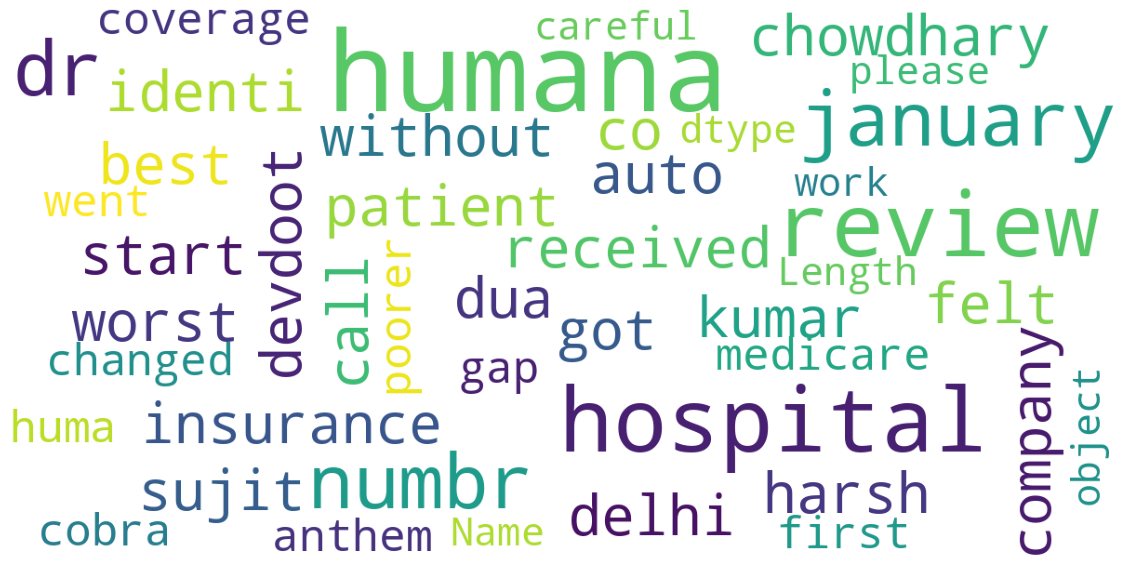

In [ ]:
from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 50,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(final["Reviews"])

In [ ]:
# highest positive sentiment reviews (with more than 5 words)
print(final[final["word_count"] >= 5].sort_values("pos", ascending = False)[["Reviews", "pos"]].head(5))
# lowest negative sentiment reviews (with more than 5 words)
print(final[final["word_count"] >= 5].sort_values("neg", ascending = False)[["Reviews", "neg"]].head(5))

ValueError: ignored

In [ ]:
# plot sentiment distribution for positive and negative reviews

for x in [0, 1]:
    subset = final[final['Rating'] == x]

    # Draw the density plot
    if x == 0:
        label = "Bad reviews"
    else:
        label = "Good reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

## Modelling

In [ ]:
# feature selection
label = "Rating"
ignore_cols = [label, "Reviews","Company"]
features = [c for c in final.columns if c not in ignore_cols]
print(features[0:15])
print(len(features))
# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final[features], final[label], test_size = 0.20, random_state = 42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

['neg', 'neu', 'pos', 'compound', 'word_count', 'char_count', 'doc2vec_vector_0', 'doc2vec_vector_1', 'doc2vec_vector_2', 'doc2vec_vector_3', 'doc2vec_vector_4', 'word_agent', 'word_almost', 'word_also', 'word_always']
278
X_train:  (197, 554)
X_test:  (50, 554)
y_train:  (197,)
y_test:  (50,)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Train a random forest classifier
rf= RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
# Make predictions on the test dataset
pred = rf.predict(X_test)
# Acuuracy Score and Classification report
print("Accuracy:", accuracy_score(y_test, pred)*100, "%")
print()
print("Classification Report:\n",classification_report(y_test, pred))
print("Confusion Matrix is:\n", confusion_matrix(y_test,pred))

Accuracy: 94.0 %

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.00      0.00      0.00         2

    accuracy                           0.94        50
   macro avg       0.48      0.49      0.48        50
weighted avg       0.92      0.94      0.93        50

Confusion Matrix is:
 [[47  1]
 [ 2  0]]


In [ ]:
from sklearn.svm import SVC
from sklearn import svm
svmc=svm.SVC()
svmc.fit(X_train,y_train)
pred_svmc=svmc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred)*100, "%")
print("Classification Report:\n",classification_report(y_test,pred_svmc))   # y_test v/s pred_svmc
print("Confusion Matrix is:\n", confusion_matrix(y_test,pred_svmc))

Accuracy: 94.0 %
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       0.00      0.00      0.00         2

    accuracy                           0.96        50
   macro avg       0.48      0.50      0.49        50
weighted avg       0.92      0.96      0.94        50

Confusion Matrix is:
 [[48  0]
 [ 2  0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred)*100, "%")
print("Classification Report:\n",classification_report(y_test,pred_mlpc))   # y_test v/s pred_rfc
print("Confusion Matrix is:\n", confusion_matrix(y_test,pred_mlpc))
cm = confusion_matrix(y_test,pred_mlpc)
#accuracy may be obtained from the confusion matrix, as the sum of the diagonal divided by the sum of all matrix entries
(cm[0,0]+cm[1,1])/np.sum(cm)

Accuracy: 94.0 %
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.33      0.50      0.40         2

    accuracy                           0.94        50
   macro avg       0.66      0.73      0.68        50
weighted avg       0.95      0.94      0.95        50

Confusion Matrix is:
 [[46  2]
 [ 1  1]]


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.94

In [ ]:
imp_features =rf.feature_importances_
print(imp_features[0:15])
print(len(imp_features))

[0.00279233 0.00654703 0.00714167 0.00800104 0.01166551 0.01170269
 0.01586493 0.04276837 0.01628558 0.01686699 0.00903387 0.00718703
 0.00918217 0.01046143 0.01321976]
554


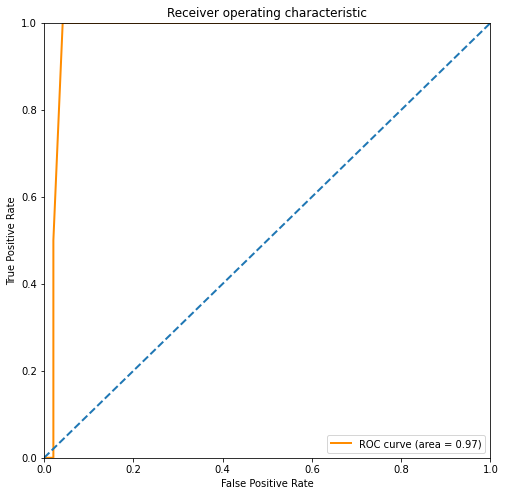

In [ ]:
# ROC curve (Receiver Operating Characteristics)
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (8, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.50')

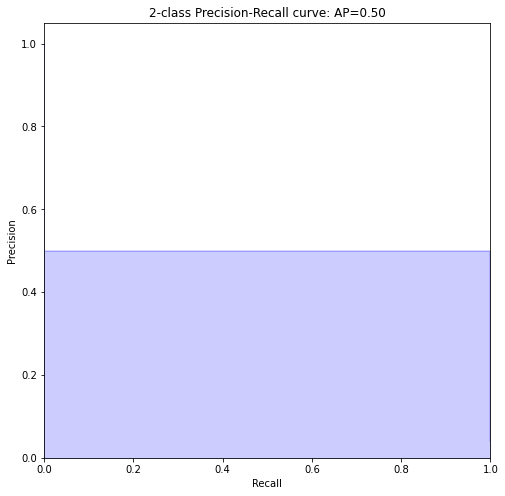

In [ ]:
# PR curve
#new added by deepsi from stck overflow

!pip install funcsigs
from funcsigs import signature
#done by me
from sklearn.metrics import average_precision_score, precision_recall_curve
# not worked for me this signature
# from sklearn.utils.fixes import signature

average_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (8, 8))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [ ]:
positive_review = dataset['Reviews'][67]
positive_review

'A baffled and angry Patient Family Member'

In [ ]:
negative_review = dataset['Reviews'][150]
negative_review

"long waits, to rudeness, and not answering certified mail. Not have they told me that my PCP was not on my coverage, they disallowed a bill from my dentist for and annual exam, stating that I did not have coverage. My PCP was on listed on my Humana card, and my dental coverage was paid in full prior to the effective date. It took me over 60 hours of phone calls and letters to straighten their errors. I could go on and on for hours about the problems that they have created through no fault of my own. They don't deserve the one star rating, that I gave them. It should be a zero."

In [ ]:
# highest positive sentiment reviews (with more than 5 words)
highest=final[final["word_count"] >= 5].sort_values("pos", ascending = False)[["Reviews", "pos","neg","compound","Company"]]
# highest negative sentiment reviews (with more than 5 words)
lowest=final[final["word_count"] >= 5].sort_values("neg", ascending = False)[["Reviews","pos" ,"neg","compound","Company"]]
print(type(highest))
print(type(lowest))
print(type(highest['compound']))

ValueError: ignored

In [ ]:
print(highest.head())
print(lowest.head())

In [ ]:
highest.describe(include="all")

In [ ]:
# Dataframe for positive reviews
positive=highest[highest['compound'] > 0.8]
positive=positive[positive.neg == 0]
positive=positive.sort_values("compound", ascending = False)
print(positive['Company'].value_counts())

In [ ]:
# Dataframe for negative reviews
negative=lowest[lowest['compound'] < -0.8]
negative=negative[negative.pos ==0]
negative=negative.sort_values("compound", ascending = False)
print(negative['Company'].value_counts())

In [ ]:
from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 20,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(positive["Reviews"])
show_wordcloud(negative["Reviews"])

In [ ]:
# Dataframe for highly positive reviews
high_pos=positive[positive['compound'] > 0.95]
high_pos=high_pos[high_pos.neg == 0]
high_pos=high_pos.sort_values("compound", ascending = False)
print(high_pos)
print(high_pos['Company'].value_counts())

In [ ]:
# Dataframe for highly negative reviews
high_neg=negative[negative['compound'] < 0.95]
high_neg=high_neg[high_neg.pos == 0]
high_neg=high_neg.sort_values("compound", ascending = True)
print(high_neg)
print(high_neg['Company'].value_counts())

In [ ]:
print(high_pos.index)
for i in high_pos.index:
    print(i,dataset['Company'][i],":",dataset['Reviews'][i],"\n")

In [ ]:
print(high_neg.index)
for i in high_neg.index[:15]:
    print(i,dataset['Company'][i],":",dataset['Reviews'][i],"\n")

In [ ]:
#Basic visualization of data using histograms
sns.countplot(data=high_neg, x = 'Company')
print(high_neg['Company'].value_counts())

In [ ]:
sns.countplot(data=high_pos, x = 'Company')
print(high_pos['Company'].value_counts())

In [ ]:
# N-grams
from nltk.util import ngrams
for message in high_pos['Reviews'][:5]:
    print()
    words=word_tokenize(message)
    sen_ngrams_pos=list(ngrams(words,2))
    print(sen_ngrams_pos)

In [ ]:
from nltk.util import ngrams
for message in high_neg['Reviews'][:5]:
    print()
    words=word_tokenize(message)
    sen_ngrams_neg=list(ngrams(words,3))
    print(sen_ngrams_neg)

In [ ]:
# function to plot most frequent terms
from nltk import FreqDist
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [ ]:
freq_words(high_pos['Reviews'], 20)

So we see the most frequent words in our positive reviews are numbr, heatlth , insurance , humana ,doctor etc.
But 'numbr' refers to any number present in the text and is not helpful,so we can remove this word from our positive reviews.

In [ ]:
positive['Reviews'] = positive['Reviews'].apply(lambda x: ' '.join([w for w in x.split() if w!="numbr"]))
positive['Reviews'] = positive['Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
freq_words(positive['Reviews'], 20)

In [ ]:
freq_words(negative['Reviews'], 20)

In [ ]:
negative['Reviews'] = negative['Reviews'].apply(lambda x: ' '.join([w for w in x.split() if w!="numbr"]))
negative['Reviews'] = negative['Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
freq_words(negative['Reviews'], 20)

In [ ]:
reviews = [r for r in high_neg["Reviews"]]
print(reviews[:10])
reviews = pd.Series(reviews).apply(lambda x: x.split())

In [ ]:
!pip install pyLDAvis
import pyLDAvis

In [ ]:
# !pip install pyLDAvis.gensim
from gensim import corpora
import gensim
import pyLDAvis
# import pyLDAvis.gensim
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)
%matplotlib inline


### Building an LDA Model

In [ ]:
# every unique term is assigned an index

dictionary = corpora.Dictionary(reviews)
#convert the list of reviews into a Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary,random_state=100,chunksize=1000, passes=50)

NameError: ignored

In [ ]:
lda_model.print_topics(num_topics=10)

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import gensim

# Load dataset
data = pd.read_csv("mydatasetforcapstone.csv")

# Preprocess data
stop_words = set(stopwords.words('english'))
reviews_tokenized = [word_tokenize(review.lower()) for review in data['Reviews']]
reviews_filtered = [[word for word in review if word not in stop_words] for review in reviews_tokenized]

# Create dictionary
dictionary = corpora.Dictionary(reviews_filtered)
corpus = [dictionary.doc2bow(review) for review in reviews_filtered]

# Train LDA model
lda_model = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=10, workers=2)

# Print topics and top words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx + 1, topic))

# Extract aspect and sentiment from reviews
for i, review in enumerate(data['Reviews']):
    review_tokenized = word_tokenize(review.lower())
    review_filtered = [word for word in review_tokenized if word not in stop_words]
    review_bow = dictionary.doc2bow(review_filtered)
    review_lda = lda_model[review_bow]
    aspect = max(review_lda, key=lambda item: item[1])[0]
    sentiment = "positive" if data['Rating'][i] > 3 else "negative" # Set sentiment based on rating
    print('Review: {} \nAspect: {} \nSentiment: {}\n'.format(review, lda_model.print_topic(aspect), sentiment))


Topic: 1 
Words: 0.080*"." + 0.049*"," + 0.026*"humana" + 0.009*"!" + 0.007*"insurance" + 0.007*"one" + 0.007*"coverage" + 0.006*"plan" + 0.006*"medicare" + 0.006*"'s"
Topic: 2 
Words: 0.052*"." + 0.038*"," + 0.012*"humana" + 0.009*"insurance" + 0.007*"even" + 0.006*"n't" + 0.005*"money" + 0.004*"get" + 0.004*"phone" + 0.004*"claim"
Topic: 3 
Words: 0.052*"." + 0.022*"," + 0.012*"humana" + 0.010*"good" + 0.007*"'s" + 0.006*"care" + 0.006*"coverage" + 0.006*"time" + 0.005*"company" + 0.005*"one"
Topic: 4 
Words: 0.095*"." + 0.024*"humana" + 0.020*"," + 0.012*"!" + 0.011*"n't" + 0.011*"get" + 0.007*"'s" + 0.006*"would" + 0.006*"company" + 0.006*"insurance"
Topic: 5 
Words: 0.046*"." + 0.031*"," + 0.018*"hospital" + 0.014*"apollo" + 0.013*"!" + 0.010*"good" + 0.009*"best" + 0.008*"delhi" + 0.007*"service" + 0.007*"'s"
Review: Felt that Dr Harsh dua is devdoot to his patient 
Aspect: 0.052*"." + 0.038*"," + 0.012*"humana" + 0.009*"insurance" + 0.007*"even" + 0.006*"n't" + 0.005*"money" + 0

Load the dataset of reviews and ratings from a CSV file.
Preprocess the data by tokenizing, lowercasing, and removing stop words.
Create a dictionary and corpus of the preprocessed reviews.
Train an LDA model on the corpus with 5 topics.
Print the topics and their top words.
Extract aspect and sentiment from each review by applying the trained LDA model and selecting the topic with the highest probability. The sentiment is set based on the rating, where a rating of 4 or higher is considered positive, and a rating of less than 4 is considered negative.
Print the review, its aspect, and sentiment.

---



# > Indented block



In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# # Load dataset
# data = pd.read_csv("reviews.csv")

# Define number of topics and top words per topic
num_topics = 5
num_top_words = 10

# Preprocess data
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(data['Reviews'])

# Train NMF model
nmf_model = NMF(n_components=num_topics, random_state=42, init='nndsvd', solver='mu')
nmf_model.fit(tfidf)

# Print topics and top words
feature_names = np.array(vectorizer.get_feature_names_out())
for topic_idx, topic in enumerate(nmf_model.components_):
    print("Topic #%d:" % topic_idx)
    top_words_idx = np.argsort(topic)[::-1][:num_top_words]
    top_words = feature_names[top_words_idx]
    print(" ".join(top_words))
    print("")

# Extract aspect and sentiment from reviews
for i, review in enumerate(data['Reviews']):
    review_tfidf = vectorizer.transform([review])
    review_nmf = nmf_model.transform(review_tfidf)
    aspect = np.argmax(review_nmf)
    sentiment = "positive" if data['Rating'][i] > 3 else "negative" # Set sentiment based on rating
    print('Review: {} \nAspect: {} \nSentiment: {}\n'.format(review, aspect, sentiment))


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/s

Topic #0:
hospital worst review delhi expensive standards friendly excellent attached trust

Topic #1:
humana insurance pay plan doctor medicare company coverage year called

Topic #2:
good service experience health coverage place environment ill problems staff

Topic #3:
apollo delhi indraprastha hospitals icu costly chamber doctors experience death

Topic #4:
best delhi india doctors service met new doctor till cancer

Review: Felt that Dr Harsh dua is devdoot to his patient 
Aspect: 1 
Sentiment: positive

Review: Arrogant doctors in dental section 
Aspect: 1 
Sentiment: positive

Review: My next door friendly hospital 
Aspect: 0 
Sentiment: positive

Review: Review about the hospital 
Aspect: 0 
Sentiment: positive

Review: Review of the hospital 
Aspect: 0 
Sentiment: positive

Review: Delhi best hospital 
Aspect: 4 
Sentiment: negative

Review: Dr. Sujit kumar chowdhary 
Aspect: 1 
Sentiment: negative

Review: Worst experience 
Aspect: 0 
Sentiment: negative

Review: Bad experien

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/s

Review: Very Delayed Service 
Aspect: 2 
Sentiment: negative

Review: Icu experience in Apollo Delhi 
Aspect: 3 
Sentiment: negative

Review: Big Hospital -Big Names-BIG MISDIAGNOSIS 
Aspect: 0 
Sentiment: negative

Review: Not so good in service 
Aspect: 2 
Sentiment: negative

Review: Dengue case 
Aspect: 1 
Sentiment: negative

Review: Dr Harsh Dua is very money minded. 
Aspect: 1 
Sentiment: negative

Review: A modern day hospital u can trust.. 
Aspect: 0 
Sentiment: negative

Review: Indraprastha Apollo hospita very good 
Aspect: 3 
Sentiment: negative

Review: Apollo 
Aspect: 3 
Sentiment: positive

Review: A genuine feedback. Have a look! 
Aspect: 1 
Sentiment: negative

Review: Very Bad Experience 
Aspect: 2 
Sentiment: positive

Review: Very Expensive! 
Aspect: 0 
Sentiment: negative

Review: Delhi Apollo- the best till date 
Aspect: 4 
Sentiment: negative

Review: Very gud hospital 
Aspect: 0 
Sentiment: negative

Review: Best , But Costly Hospital - Apollo 
Aspect: 4 
Sentim

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/s


Review: Worst condition of attendents of patients 
Aspect: 0 
Sentiment: negative

Review: Apollo ICU is a death chamber 
Aspect: 3 
Sentiment: negative

Review: Apollo ICU is a death chamber 
Aspect: 3 
Sentiment: negative

Review: Horrible Care 
Aspect: 1 
Sentiment: negative

Review: Appolo hospital delhi falling standards 
Aspect: 0 
Sentiment: negative

Review: Careless people with a eye always on your walllet 
Aspect: 1 
Sentiment: negative

Review: Apollo hospital is a fish market 
Aspect: 3 
Sentiment: negative

Review: Dr. Subash gupta: A Saviour 
Aspect: 1 
Sentiment: negative

Review: We are grateful to Dr Sujit Chowdhary 
Aspect: 1 
Sentiment: negative

Review: The best hospital 
Aspect: 4 
Sentiment: negative

Review: About Dr. Gopalan is God for Me thanks to him for 
Aspect: 1 
Sentiment: negative

Review: Best Doctor's i ever met 
Aspect: 4 
Sentiment: negative

Review: My 2 Yrs Old Daughter's Surgery 
Aspect: 1 
Sentiment: negative

Review: Dr.Sarath Gopalan 
Aspect: 1

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:874: RuntimeWarning: invalid value encountered in double_scalars
  if (previous_error - error) / error_at_init < tol:
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.



Review: Apollo Hospitals Review – Indraprastha, New Delhi 
Aspect: 3 
Sentiment: negative

Review: On the audit time she will try to manage all the things one thing more her assistant neha ..bloody ugly women ...she doesn't know how to speak.still she got a job. Usha u are very clever . you keep all the certi ficates of your staff on top of that u will not allow them to from your cage. I have the nurses they are very dedicated.but these monsters usha , gracy abraham always harass them.physically as well as mentally. usha please change yourself. 
Aspect: 1 
Sentiment: negative

Review: But the doctors and the nurses especially in NICU took really good care of the baby & we saw her recovering. Being my first visit to the hospital I am impressed with their services & the facilities. Now the child is 1 month old and she has not encountered any problems henceforth. This is only on the basis of my personal experience that I thought of sharing it.Thanks 
Aspect: 2 
Sentiment: positive

Revie

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/s

Review: Head injury 
Aspect: 1 
Sentiment: negative

Review: I made multiple phone calls to Humana customer service and the Walgreens Pharmacy, After receiving poor responses from Humana, I wanted to make this issue visible to other current and perspective Humana customers. I live in NC but often visit family in IL. I take multiple medications daily and sometimes forget to pack one of them. I take a medication for cancer. They are tiny pills that I did not include with my other medications on my last trip. When I realized I did not have the medication, I called my doctor who phoned in a prescription to Walgreens.  
Aspect: 1 
Sentiment: negative

Review: This is absolutely the worst health insurance company I've ever dealt with. They are worthless, sending now claims that I paid, back in January, and denying them, because of "an error," are you kidding me? 240.00 at the Syracuse Eye Center with a Ph.D., an excellent optometrist, highly recommended. Now they're denying it because of an 

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/s

Review: My good health has resulted in very little need for insurance coverage. When coverage was needed, Humana provided it without any problems. When my primary care physician reported that she was leaving Humana (she retired soon thereafter) it was not difficult to find another very good physician who continues my use of Humana. 
Aspect: 1 
Sentiment: positive

Review: The HMO has good selection of doctors and hospitals. I use a PA and can usually get in easily and have no trouble being referred if needed. Have had coverage for several years and plan to continue with Humana. 
Aspect: 1 
Sentiment: positive

Review: Humana is ONLY IN IT FOR THEMSELVES!!! They cover NOTHING and it is EXTREMELY difficult to discuss anything with customer service. 
Aspect: 1 
Sentiment: negative

Review: They do not tell you about the $30 per specialist. The prices are terrible. Outraged still. I now have a credit bureau problem... Customer service is also rude. Very bad experience. 
Aspect: 1 
Sentimen

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/s


Review: Humana is a lying company and they did are charging me 149 a month and they are not getting what the doctor order. And they are using a doctor that I had 4 years ago that I have not seen and getting orders for oxygen equipment and he is not covered by the plan and that is wrong. And they need to be closed down for good. That is fraud. 
Aspect: 1 
Sentiment: negative

Review: Humana is the quintessential example of how all health insurance companies in America are stealing us blind, and why the USA consistently ranks among the worse offenders regarding the health care of its own citizens. I am 69 years old and retired, living primarily on my $857 Social Security check. When I applied for extra help from Medicare to help pay for my mounting drug bills, I was TURNED DOWN. I'm apparently making too much money. Because I allowed my Plan D policy with WellCare to lapse for 8 months, I was FINED FOR LIFE, in spite of the fact I had to pay my own medication bills for nearly a year, an

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/s

Review: I myself have humana. I won't even give them the courtesy of using a capital H in the name of their so called INSURANCE COMPANY. See, I have been in this field for 34 years and I have also taught medical billing, coding and insurance for 14. LOL on me right? No, in 2001 I proceeded to study even more just because I seen so much of this ugly stuff. So I tested to become a Medicare compliance officer. Yep, that's right. Now I have that too. At one point I even went to school (only for a few weeks) just to get my broker's insurance license for property and casualty, I just did that for work that my husband had. But I even learned more about insurance, they all really work the same way. 
Aspect: 1 
Sentiment: negative

Review: I have never written a review, but this deserves one! Itâ€™s Sunday afternoon, just watching television, a Humana commercial is on boasting about how wonderful they are. My 91 year old grandmother is now in a long term nursing home, she has Alzheimerâ€™s, and

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/s

In [ ]:
#cnn mode
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load data into a pandas dataframe
df = pd.read_csv('mydatasetforcapstone.csv')

# Preprocess the data
reviews = df['Reviews'].values
ratings = df['Rating'].values

# Convert ratings to binary sentiment labels
sentiment = np.where(ratings > 3, 1, 0)

# Tokenize the reviews
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

# Pad the sequences
maxlen = 100
X = pad_sequences(sequences, padding='post', maxlen=maxlen)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, sentiment, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


Epoch 1/10
8/8 [==============================] - 2s 69ms/step - loss: 0.5666 - accuracy: 0.7500 - val_loss: 0.3811 - val_accuracy: 0.8667
Epoch 2/10
8/8 [==============================] - 0s 34ms/step - loss: 0.4277 - accuracy: 0.8292 - val_loss: 0.3550 - val_accuracy: 0.8667
Epoch 3/10
8/8 [==============================] - 0s 30ms/step - loss: 0.3879 - accuracy: 0.8292 - val_loss: 0.3542 - val_accuracy: 0.8667
Epoch 4/10
8/8 [==============================] - 0s 30ms/step - loss: 0.3621 - accuracy: 0.8292 - val_loss: 0.3226 - val_accuracy: 0.8667
Epoch 5/10
8/8 [==============================] - 0s 31ms/step - loss: 0.3189 - accuracy: 0.8292 - val_loss: 0.3123 - val_accuracy: 0.8667
Epoch 6/10
8/8 [==============================] - 0s 30ms/step - loss: 0.2812 - accuracy: 0.8292 - val_loss: 0.3077 - val_accuracy: 0.8667
Epoch 7/10
8/8 [==============================] - 0s 33ms/step - loss: 0.2707 - accuracy: 0.8292 - val_loss: 0.3088 - val_accuracy: 0.8667
Epoch 8/10
8/8 [===========

There are several algorithms used for feature extraction in sentiment analysis, some of which are:

Bag of Words (BoW) - BoW is a common algorithm used in sentiment analysis. It involves counting the frequency of words in a text corpus and using these counts as features for a machine learning model.

Term Frequency-Inverse Document Frequency (TF-IDF) - TF-IDF is another popular algorithm used in sentiment analysis. It involves measuring the importance of a word in a document corpus by taking into account its frequency in the document and the frequency of the word across the corpus.

Word2Vec - Word2Vec is a neural network-based algorithm that converts words into dense vectors. It can capture the semantic relationships between words and can be used as features for a sentiment analysis model.

Latent Dirichlet Allocation (LDA) - LDA is a topic modeling algorithm that can identify latent topics within a text corpus. These topics can then be used as features for a sentiment analysis model.

Convolutional Neural Networks (CNN) - CNNs are deep learning algorithms that can be used to automatically learn features from text. They can identify patterns and relationships within a text corpus and use these as features for a sentiment analysis model.

Recurrent Neural Networks (RNN) - RNNs are another deep learning algorithm that can be used for feature extraction in sentiment analysis. They can capture the sequential nature of text and use this information to generate features for a sentiment analysis model.

In [ ]:
#rnn

import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load data into a pandas dataframe
df = pd.read_csv('mydatasetforcapstone.csv')

# Preprocess the data
reviews = df['Reviews'].values
ratings = df['Rating'].values

# Convert ratings to binary sentiment labels
sentiment = np.where(ratings > 3, 1, 0)

# Tokenize the reviews
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

# Pad the sequences
maxlen = 100
X = pad_sequences(sequences, padding='post', maxlen=maxlen)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, sentiment, test_size=0.2, random_state=42)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=maxlen))
model.add(SimpleRNN(units=64, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


Epoch 1/10
8/8 [==============================] - 2s 82ms/step - loss: 0.5815 - accuracy: 0.7542 - val_loss: 0.4069 - val_accuracy: 0.8667
Epoch 2/10
8/8 [==============================] - 0s 47ms/step - loss: 0.4998 - accuracy: 0.8292 - val_loss: 0.3968 - val_accuracy: 0.8667
Epoch 3/10
8/8 [==============================] - 0s 50ms/step - loss: 0.4920 - accuracy: 0.8083 - val_loss: 0.4087 - val_accuracy: 0.8667
Epoch 4/10
8/8 [==============================] - 0s 46ms/step - loss: 0.4714 - accuracy: 0.8292 - val_loss: 0.3944 - val_accuracy: 0.8667
Epoch 5/10
8/8 [==============================] - 1s 78ms/step - loss: 0.4431 - accuracy: 0.8292 - val_loss: 0.4008 - val_accuracy: 0.8667
Epoch 6/10
8/8 [==============================] - 1s 74ms/step - loss: 0.4965 - accuracy: 0.8208 - val_loss: 0.4047 - val_accuracy: 0.8667
Epoch 7/10
8/8 [==============================] - 1s 79ms/step - loss: 0.4531 - accuracy: 0.8292 - val_loss: 0.3914 - val_accuracy: 0.8667
Epoch 8/10
8/8 [===========

In this example, we're using a simple RNN layer with 64 units and a tanh activation function. We're also using a dropout layer to prevent overfitting. The model is compiled with the binary cross-entropy loss function and the Adam optimizer.

As with the CNN example, you may need to adjust the model architecture and parameters to optimize performance for your specific dataset and task.

In addition to Latent Dirichlet Allocation (LDA), there are several other algorithms for topic modeling. Here are a few examples:

Non-negative Matrix Factorization (NMF): NMF is a matrix factorization technique that factorizes a non-negative matrix into two non-negative matrices. In topic modeling, one matrix represents the document-topic distribution, while the other represents the topic-word distribution. NMF has been shown to perform well for short and sparse text data.

Correlated Topic Model (CTM): CTM is an extension of LDA that models correlations between topics. In LDA, each topic is assumed to be independent of other topics, but in CTM, topics are allowed to be correlated. This can be useful for tasks where topics are related to each other.

Hierarchical Dirichlet Process (HDP): HDP is a Bayesian nonparametric approach to topic modeling that allows for an unbounded number of topics. It is similar to LDA in that it assumes that documents are generated by a mixture of topics, but it does not require the number of topics to be specified ahead of time.

Latent Semantic Analysis (LSA): LSA is a matrix factorization technique that uses Singular Value Decomposition (SVD) to identify latent topics in a corpus. It is similar to NMF, but it can handle negative values in the matrix. LSA has been used for applications such as information retrieval and text classification.

Structural Topic Model (STM): STM is an extension of LDA that incorporates document metadata and covariates into the modeling process. It can be used to model topics as a function of covariates, which can be useful for tasks such as analyzing how topics vary across different groups or time periods.



In [ ]:
!pip install git+https://github.com/roamanalytics/stm.git

%cd stm
# !pip install .
# from stm import STM


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/roamanalytics/stm.git to /tmp/pip-req-build-u69e63zq
  Running command git clone --filter=blob:none --quiet https://github.com/roamanalytics/stm.git /tmp/pip-req-build-u69e63zq
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/roamanalytics/stm.git /tmp/pip-req-build-u69e63zq did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/roamanalytics/stm.git /tmp/pip-req-build-u69e63zq did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with p

In [ ]:
 from stm import STM

ModuleNotFoundError: ignored

In [ ]:
#stm
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from gensim.matutils import Sparse2Corpus
from gensim.models.ldamodel import LdaModel
from stm import STM

# Load data into a pandas dataframe
df = pd.read_csv('mydatasetforcapstone.csv')

# Preprocess the data
reviews = df['Reviews'].values
ratings = df['Rating'].values

# Convert ratings to binary sentiment labels
sentiment = np.where(ratings > 3, 1, 0)

# Remove stopwords and punctuation from the reviews
stopwords = ['a', 'an', 'the', 'and', 'or', 'but', 'as', 'of', 'at', 'by', 'for', 'in', 'on', 'to', 'with']
reviews = [re.sub(r'[^\w\s]', '', r) for r in reviews]
reviews = [' '.join([w for w in r.lower().split() if w not in stopwords]) for r in reviews]

# Vectorize the reviews
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(reviews)
vocab = vectorizer.get_feature_names()
corpus = Sparse2Corpus(X)

# Create metadata for sentiment labels
metadata = {'sentiment': sentiment}

# Define the STM model
model = STM(alpha=0.1, gamma=0.01, eta=0.01, K=10, metadata=metadata, seed=42)

# Fit the model
model.add_documents(corpus, vocab)
model.fit()

# Print the top words for each topic
for topic in range(model.K):
    print('Topic {}:'.format(topic))
    for word, weight in model.get_topic_words(topic, top_n=10):
        print('\t{} ({:.2f})'.format(word, weight))


ModuleNotFoundError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('mydatasetforcapstone.csv')

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Fit the vectorizer on the reviews
X = vectorizer.fit_transform(df['Reviews'])

# Create an LSA model
lsa = TruncatedSVD(n_components=5)

# Fit the LSA model on the TF-IDF vectors
X_lsa = lsa.fit_transform(X)

# Get the most important words for each topic
terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa.components_):
    print(f"Topic {i}:")
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:10]
    for t in sorted_terms:
        print(f"{t[0]}: {t[1]}")
    print('\n')

# Assign a sentiment score to each review based on its topic
df['Topic'] = X_lsa.argmax(axis=1)
df['Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

# Calculate the sentiment distribution for each topic
sentiment_distribution = df.groupby(['Topic', 'Sentiment']).size().unstack(fill_value=0)
sentiment_distribution['Total'] = sentiment_distribution.sum(axis=1)
sentiment_distribution['Positive Percentage'] = sentiment_distribution['Positive'] / sentiment_distribution['Total']
sentiment_distribution['Negative Percentage'] = sentiment_distribution['Negative'] / sentiment_distribution['Total']
print(sentiment_distribution)


Topic 0:
to: 0.34635502910442556
the: 0.3093324825989045
and: 0.27966493851836666
they: 0.20659212807849583
my: 0.18597301016158282
for: 0.1662376124124785
humana: 0.16421593192596282
have: 0.15563199508113054
of: 0.14903771503798818
it: 0.1451649497217565


Topic 1:
hospital: 0.7097553310940448
apollo: 0.39451700030175096
delhi: 0.3162562599959041
best: 0.30498328317533635
good: 0.22117577721401038
very: 0.16395526965742094
worst: 0.07654572470084019
is: 0.06930047301187257
indraprastha: 0.05214323747105129
expensive: 0.05055758669800488


Topic 2:
good: 0.5500878691137953
very: 0.41760258309756076
hospital: 0.23862570839070382
experience: 0.08382334878382999
service: 0.07958699900399543
expensive: 0.05984342921972418
bad: 0.04634663316190608
with: 0.0366870830691543
not: 0.036657007366195815
worst: 0.034291570498171546


Topic 3:
apollo: 0.6533381945250976
good: 0.2797658102645398
very: 0.256715303220291
is: 0.17719047630897783
experience: 0.13504505888917603
icu: 0.1297404295052415


In this code, we load the reviews dataset into a pandas DataFrame, create a TF-IDF vectorizer with a maximum of 1000 features, fit the vectorizer on the reviews, and then create an LSA model with 5 components. We then fit the LSA model on the TF-IDF vectors and print the most important words for each topic.

Next, we assign a sentiment score to each review based on its topic and rating, with ratings of 4 or higher considered positive and ratings below 4 considered negative. Finally, we calculate the sentiment distribution for each topic and print the results.

Note that this is just an example implementation, and you may need to modify the code to fit your specific dataset and use case. Additionally, LSA may not be the best algorithm for all cases of aspect-based sentiment analysis, so you may want to explore other algorithms as well.